In [ ]:
1.

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


movies_df = pd.read_csv("./movies.csv",na_values='NA', keep_default_na=False , encoding = "ISO-8859-1")

# Seleccionar las columnas numéricas para el análisis
features_num = [
    'budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount',
    'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount'
]

# Preparar el preprocesamiento para las variables numéricas

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar las variables
])

# Aplicar el preprocesamiento a las variables numéricas
X_preprocessed = numeric_transformer.fit_transform(movies_df[features_num])
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=features_num)
# Guardar el DataFrame preprocesado en un archivo CSV
X_preprocessed_df.to_csv("./movies.csv", index=False)

print(X_preprocessed_df.head())


     budget   revenue   runtime  popularity   voteAvg  voteCount  \
0 -0.404342 -0.355681 -0.086728   -0.142920 -0.809539   0.274380   
1  0.055440 -0.303564  0.343289   -0.195656  0.007403  -0.442230   
2 -0.215020  4.744733  0.737472    0.226864  1.743405   5.887053   
3  2.029796  5.835649 -0.015059    0.387782  1.334934   5.628083   
4  0.975003  4.096481  1.490002    0.034071  2.049758   7.992433   

   genresAmount  productionCoAmount  productionCountriesAmount  actorsAmount  
0     -0.519953           -0.468349                  -0.250235     -0.057791  
1      0.344007           -0.078445                   0.078158     -0.058056  
2      0.344007           -0.468349                  -0.250235     -0.055667  
3     -0.519953           -0.858253                  -0.250235     -0.057818  
4      0.344007           -0.468349                  -0.250235     -0.056437  


2.

3.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


movies_df = pd.read_csv("./movies.csv",na_values='NA', keep_default_na=False , encoding = "ISO-8859-1")


relevant_columns = [
    'budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount', 
    'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount', 'releaseYear'
]
movies_df_filtered = movies_df[relevant_columns].dropna()

# Estandarización de las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(movies_df_filtered)


inertia = []
K_range = range(1, 11)  # Probando de 1 a 10 clústeres

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficando la gráfica de codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Gráfica de Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


## Ejercicio 2
Estadístico de Hopkins obtenido: 1.0 
Es decir es posible realizar clustering de los datos , donde estos están agrupados de manera delimitada.

Estadístico de Hopkins: 1.0


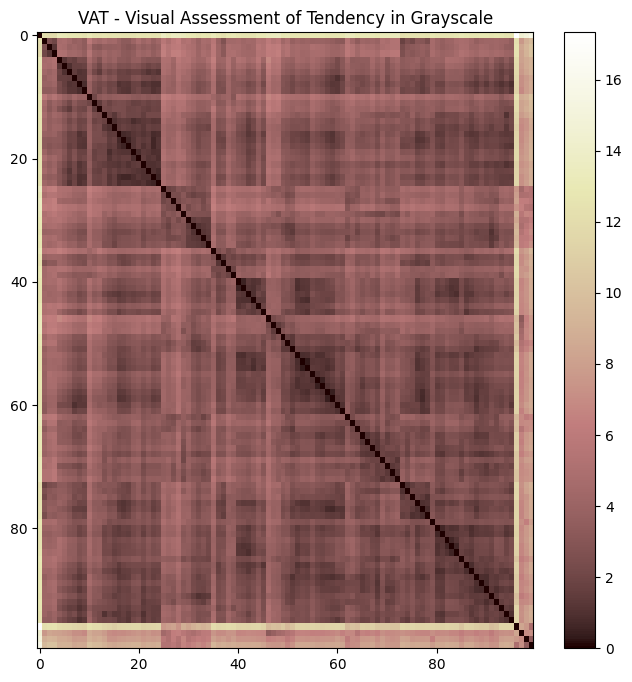

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Función para calcular el estadístico de Hopkins
def hopkins_statistic(X, sample_size=100):
    n = X.shape[0]
    m = sample_size
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.rand(m, X.shape[1])
    u_dist, _ = nbrs.kneighbors(rand_X, n_neighbors=1)
    w_dist, _ = nbrs.kneighbors(X[np.random.choice(n, m, replace=False), :], n_neighbors=1)
    H = sum(u_dist) / (sum(u_dist) + sum(w_dist))
    return H[0]

# Función para visualizar la VAT (Visual Assessment of cluster Tendency)
def vat(X, sample_size=100):
    np.random.seed(42)  # Seed for reproducibility
    sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
    X_sample = X[sample_indices, :]

    # Compute the condensed distance matrix
    pdist_matrix = pdist(X_sample)
    
    # Perform hierarchical clustering
    Z = linkage(pdist_matrix, method='complete')
    dendro = dendrogram(Z, no_plot=True)
    idx = dendro['leaves']

    # Reorder the distance matrix according to the clustering
    X_ordered = squareform(pdist_matrix)[np.ix_(idx, idx)]
    
    # Plot the VAT heatmap in grayscale
    plt.figure(figsize=(8, 8))
    plt.imshow(X_ordered, cmap='pink', aspect='auto')
    plt.colorbar()
    plt.title('VAT - Visual Assessment of Tendency in Grayscale')
    plt.show()


movies_df = pd.read_csv("./movies.csv", na_values='NA', keep_default_na=False, encoding="ISO-8859-1")


X_prepared = movies_df.select_dtypes(include=[np.number]).values

# Calcular el estadístico de Hopkins
hopkins_value = hopkins_statistic(X_prepared, sample_size=100)
print(f"Estadístico de Hopkins: {hopkins_value}")

# Visualizar la VAT con la muestra reducida
vat(X_prepared, sample_size=100)

### Ejercicio 4 y 5
algoritmos k-medias y clustering jerárquico
comparativa de las siluetas de cada uno

In [2]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import pandas as pd

movies_df = pd.read_csv("./movies.csv",na_values='NA', keep_default_na=False , encoding = "ISO-8859-1")
num_clusters = 4

# Aplicar K-Medias
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(movies_df)

# Calcular la puntuación de silueta para K-Medias
silhouette_kmeans = silhouette_score(movies_df, kmeans_labels)

# Aplicar Clustering Jerárquico
linked = linkage(movies_df, method='ward')


hierarchical_labels = fcluster(linked, t=num_clusters, criterion='maxclust')

# Calcular la puntuación de silueta para Clustering Jerárquico
silhouette_hierarchical = silhouette_score(movies_df, hierarchical_labels)

# Comparar los resultados
print("Silhouette Score K-Medias:", silhouette_kmeans)
print("Silhouette Score Clustering Jerárquico:", silhouette_hierarchical)

Silhouette Score K-Medias: 0.14237936596214024
Silhouette Score Clustering Jerárquico: 0.24300714544907437
